# Consumer Complaint Resolution Analysis Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Data from the Given excel file.

customer_train = pd.read_csv("Consumer_Complaints_train.csv")
customer_test = pd.read_csv("Consumer_Complaints_test.csv")
customer_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [3]:
# Check the data type for both data (test file and train file)

print("Training Data Type: ", type(customer_train))
print("Testing Data Type: ", type(customer_test))

Training Data Type:  <class 'pandas.core.frame.DataFrame'>
Testing Data Type:  <class 'pandas.core.frame.DataFrame'>


In [4]:
# Do missing value analysis and dropcolumns where more than 25% of data are missing

print(customer_train.isnull().sum() * 100 / len(customer_train))

customer_train = customer_train.drop(customer_train.loc[:, ["Sub-product", "Sub-issue", "Consumer complaint narrative", "Company public response", "Tags", "Consumer consent provided?"]], axis = 1)

Date received                    0.000000
Product                          0.000000
Sub-product                     28.925058
Issue                            0.000000
Sub-issue                       61.139322
Consumer complaint narrative    84.342688
Company public response         81.067696
Company                          0.000000
State                            0.809063
ZIP code                         0.811293
Tags                            86.002062
Consumer consent provided?      71.689752
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64


In [5]:
# Extracting Day, Month,and Year from Date Received Column and create new fields for a month, year,and day

import datetime

customer_train["Month"] = pd.to_datetime(customer_train["Date received"], errors = "coerce").dt.strftime("%B")
customer_train["Day"] = pd.to_datetime(customer_train["Date received"], errors = "coerce").dt.strftime("%d")
customer_train["Year"] = pd.to_datetime(customer_train["Date received"], errors = "coerce").dt.strftime("%Y")

In [6]:
# Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”

customer_train["Days Held"] = pd.to_datetime(customer_train["Date sent to company"]) - pd.to_datetime(customer_train["Date received"])
customer_train["Days Held"] = pd.DataFrame([int(x.days) for x in customer_train["Days Held"]])

In [7]:
# Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"fields

customer_train = customer_train.drop(customer_train.loc[:, ["Date received", "Date sent to company", "ZIP code", "Complaint ID"]], axis = 1)

In [8]:
# Imputing Nullvalue in “State” by Mode

from sklearn.impute import SimpleImputer

si_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

customer_train.iloc[:, 3:4] = si_mode.fit_transform(customer_train.iloc[:, 3:4])

In [9]:
# with the help of the days we calculated above,create a new field 'Week_Received'
# where we calculate the week based on the day of receiving

customer_train["Week_Received"] = pd.DataFrame([int(x) // 7 for x in customer_train["Day"]])

In [10]:
# store data of disputed people into the “disputed_cons” variable for future tasks

disputed_cons = customer_train[customer_train["Consumer disputed?"] == "Yes"]

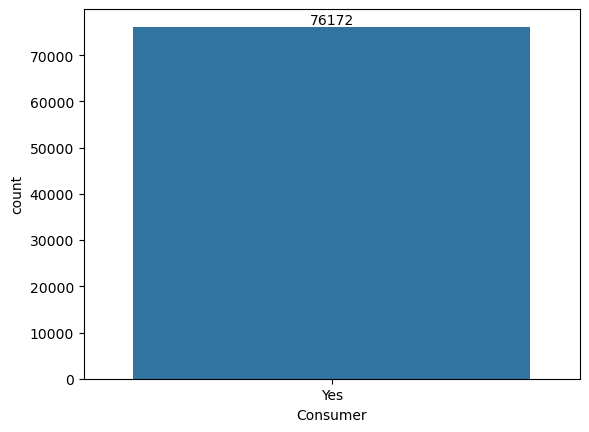

In [11]:
# Plot bar graph of the total no of disputes of consumers with the help of seaborn

counts = disputed_cons["Consumer disputed?"].value_counts().rename_axis('Consumer').reset_index(name='count')

ax = sns.barplot(x='Consumer', y='count', data=counts)
ax.bar_label(ax.containers[0])
plt.show()

<AxesSubplot:xlabel='count', ylabel='Product'>

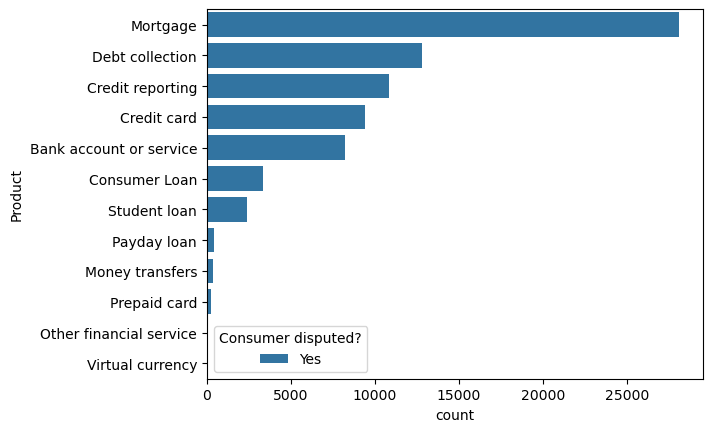

In [12]:
# Plot bar graph of the total no of disputes products-wise with the help of seaborn

sns.countplot(data=disputed_cons, y="Product", order = disputed_cons["Product"].value_counts().index, hue="Consumer disputed?")

<AxesSubplot:xlabel='count', ylabel='Issue'>

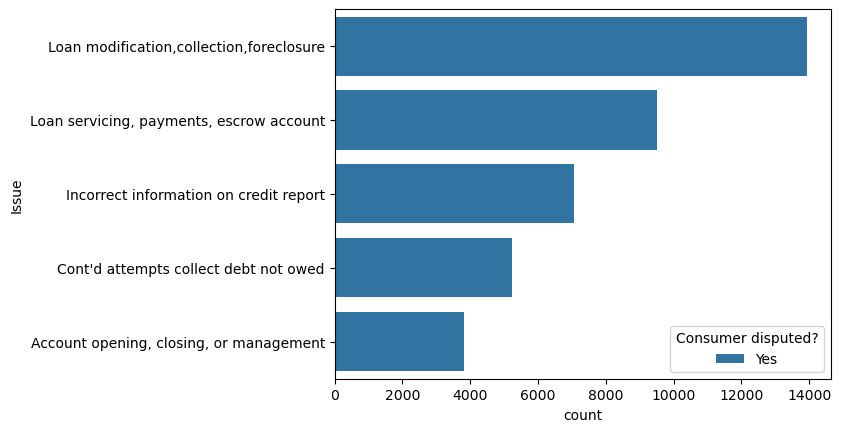

In [13]:
# Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn

sns.countplot(data=disputed_cons, y="Issue", order = disputed_cons["Issue"].value_counts().head(5).index, hue="Consumer disputed?")

<AxesSubplot:xlabel='count', ylabel='State'>

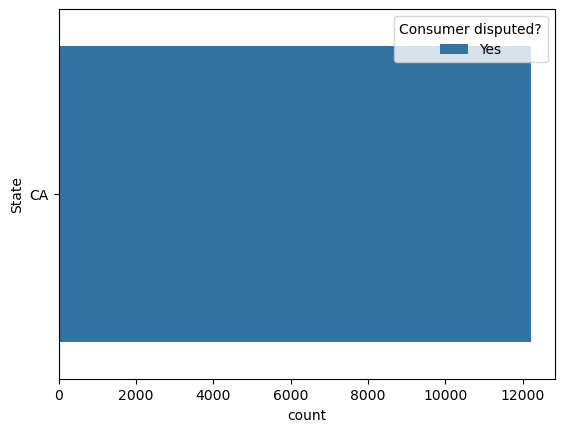

In [14]:
# Plot bar graph of the total no of disputes by State with Maximum Disputes

sns.countplot(data=disputed_cons, y="State", order = disputed_cons["State"].value_counts().head(1).index, hue="Consumer disputed?")

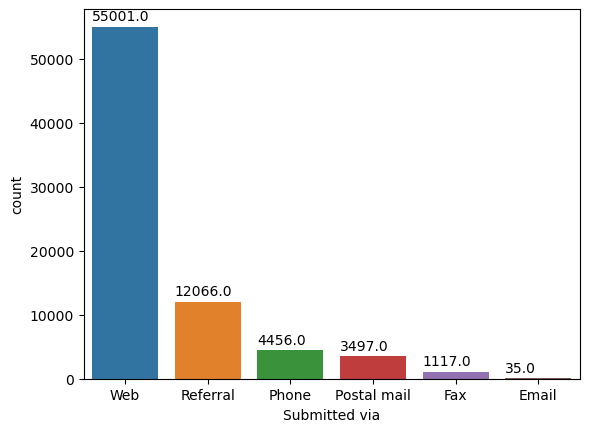

In [15]:
# Plot bar graph of the total no of disputes Submitted Via different source

ax = sns.countplot(data=disputed_cons, x="Submitted via", order = disputed_cons["Submitted via"].value_counts().index)
for x in ax.patches:
    ax.annotate("{}".format(x.get_height()), (x.get_x(), x.get_height() + 1000))

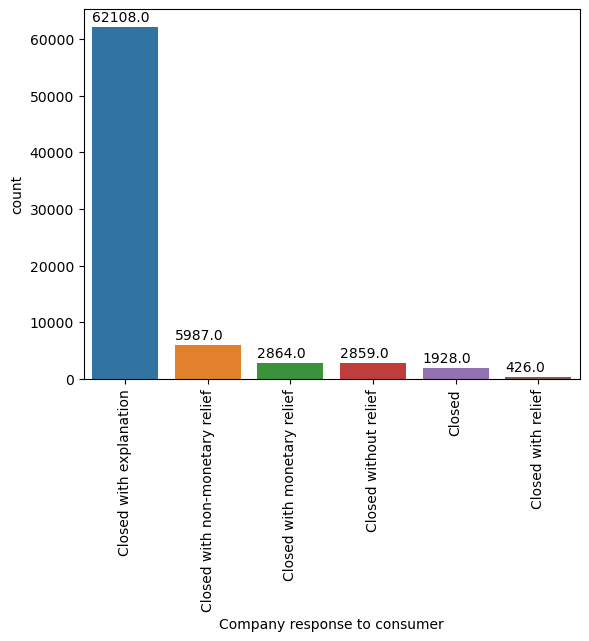

In [16]:
# Plot bar graph of the total no of disputes where the Company's Response to the Complaints

ax = sns.countplot(data=disputed_cons, x="Company response to consumer", order = disputed_cons["Company response to consumer"].value_counts().index)
plt.xticks(rotation = 90)
for x in ax.patches:
    ax.annotate("{}".format(x.get_height()), (x.get_x(), x.get_height() + 1000))

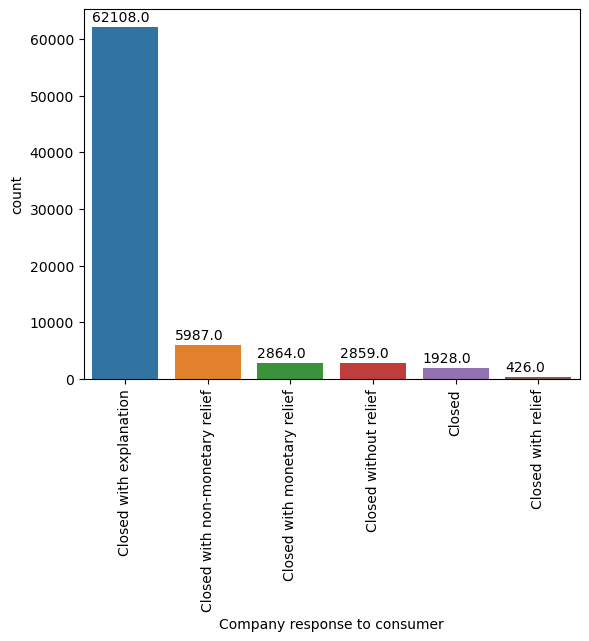

In [17]:
# Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

ax = sns.countplot(data=disputed_cons, x="Company response to consumer", order = disputed_cons["Company response to consumer"].value_counts().index)
plt.xticks(rotation = 90)
for x in ax.patches:
    ax.annotate("{}".format(x.get_height()), (x.get_x(), x.get_height() + 1000))

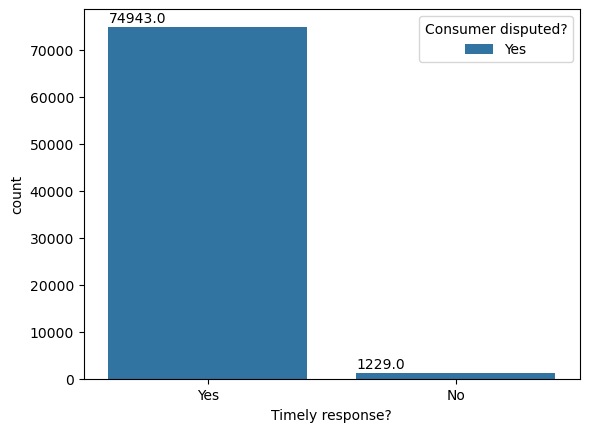

In [18]:
# Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response

ax = sns.countplot(data=disputed_cons, x="Timely response?", order = disputed_cons["Timely response?"].value_counts().index, hue="Consumer disputed?")
for x in ax.patches:
    ax.annotate("{}".format(x.get_height()), (x.get_x(), x.get_height() + 1000))

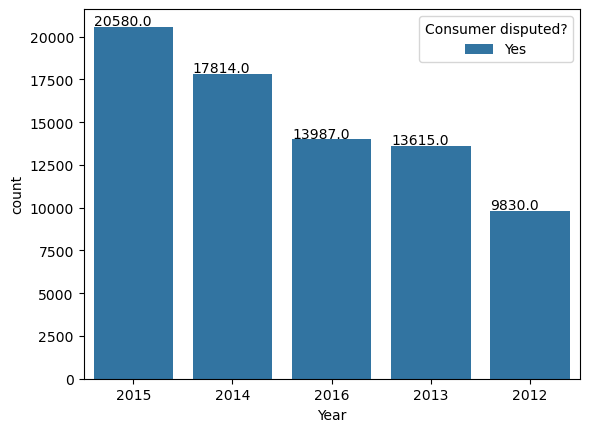

In [19]:
# Plot bar graph ofthe total no of disputes over Year Wise Complaints

ax = sns.countplot(data=disputed_cons, x="Year", order = disputed_cons["Year"].value_counts().head(5).index, hue="Consumer disputed?")
for x in ax.patches:
    ax.annotate("{}".format(x.get_height()), (x.get_x(), x.get_height() + 100))

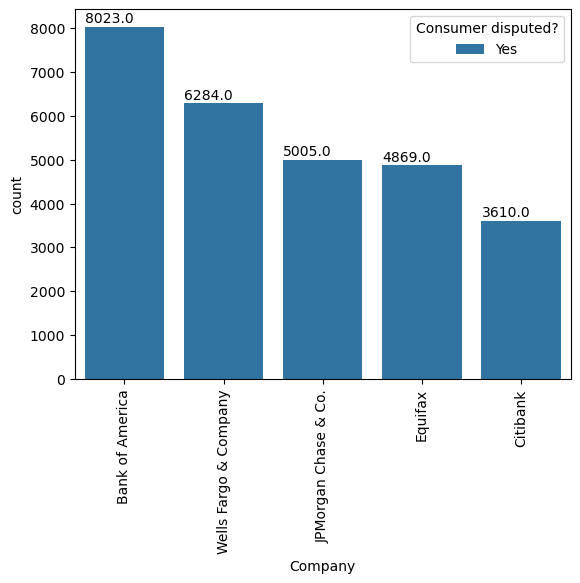

In [20]:
# Plot bar graph of Top Companies with Highest Complaints

ax = sns.countplot(data=disputed_cons, x="Company", order = disputed_cons["Company"].value_counts().head(5).index, hue="Consumer disputed?")
plt.xticks(rotation = 90)
for x in ax.patches:
    ax.annotate("{}".format(x.get_height()), (x.get_x(), x.get_height() + 100))

In [21]:
# Converte all negative days held to zero(it is the time taken by the authority that can't be negative)

customer_train["Days Held"] = customer_train["Days Held"].replace([-1], 0)

In [22]:
# Drop Unnecessary Columns for the Model Building like:'Company', 'State', 'Year_Received', 'Days_held'

customer_train = customer_train.drop(customer_train.loc[:, ["Company", "State", "Year", "Days Held"]], axis = 1)

In [23]:
# Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

customer_train["Consumer disputed?"] = le.fit_transform(customer_train["Consumer disputed?"])

In [24]:
# Create Dummy Variables for categorical features and concat with the original data frame
# like: 'Product,’'Submitted via,’'Company response to consumer,’'Timely response?'

customer_train = pd.get_dummies(customer_train, columns=["Issue", "Product", "Submitted via", "Company response to consumer", "Timely response?", "Month"])

In [25]:
# Scaling the Data Sets (note:discard dependent variable before doing standardization)
# and Make feature Selection with the help of PCA up to 80% of the information.

X = customer_train.drop("Consumer disputed?", axis = 1)
y = customer_train["Consumer disputed?"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

pca = PCA(n_components=2)
principleComponents = pca.fit_transform(X)
principleDF = pd.DataFrame(data=principleComponents, columns=["PC1", "PC2"])
principleDF.head()

,PC1,PC2
0,1.990533,0.014869
1,-0.565746,1.753668
2,0.011371,2.414194
3,0.065501,-0.884958
4,1.548586,-1.628520


In [26]:
# Splitting the Data Sets Into X and Y by the dependent and independent variables (data selected by PCA)

X = principleDF
print(X.head())
print(y.head())

        PC1       PC2
0  1.990533  0.014869
1 -0.565746  1.753668
2  0.011371  2.414194
3  0.065501 -0.884958
4  1.548586 -1.628520
0    0
1    1
2    0
3    0
4    1
Name: Consumer disputed?, dtype: int32


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [28]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

accuracy_score(y_test, lr_pred) * 100

78.99027340375129

In [29]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

accuracy_score(y_test, dt_pred) * 100

75.7754800590842

In [30]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

accuracy_score(y_test, rf_pred) * 100

75.4298932582704

In [31]:
# ADA Boost Classifier

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.6)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

accuracy_score(y_test, ada_pred) * 100

78.99027340375129

In [32]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

accuracy_score(y_test, gb_pred) * 100

78.94428806332043

In [33]:
# K Neighbours Classifier

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=535)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)

accuracy_score(y_test, knc_pred) * 100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


78.99027340375129

In [34]:
# XGB Classifier

from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.25,n_estimators=100)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

accuracy_score(y_test, xgb_pred) * 100

78.98887990858671

In [35]:
# Whoever gives the most accurate result uses it and predicts the outcome
# for the test file and fills its dispute column so the business team can take some action accordingly

# Most Accurate Result: XGB Classifier

# Performing Initial Preprocessing on Test Dataset

customer_test = customer_test.drop(customer_test.loc[:, ["Sub-product", "Sub-issue", "Consumer complaint narrative", "Company public response", "Tags", "Consumer consent provided?"]], axis = 1)

customer_test["Month"] = pd.to_datetime(customer_test["Date received"], errors = "coerce").dt.strftime("%B")
customer_test["Day"] = pd.to_datetime(customer_test["Date received"], errors = "coerce").dt.strftime("%d")
customer_test["Year"] = pd.to_datetime(customer_test["Date received"], errors = "coerce").dt.strftime("%Y")

customer_test["Days Held"] = pd.to_datetime(customer_test["Date sent to company"]) - pd.to_datetime(customer_test["Date received"])
customer_test["Days Held"] = pd.DataFrame([int(x.days) for x in customer_test["Days Held"]])

customer_test = customer_test.drop(customer_test.loc[:, ["Date received", "Date sent to company", "ZIP code", "Complaint ID"]], axis = 1)

customer_test.iloc[:, 3:4] = si_mode.fit_transform(customer_test.iloc[:, 3:4])

customer_test["Week_Received"] = pd.DataFrame([int(x) // 7 for x in customer_test["Day"]])

customer_test = customer_test.drop(customer_test.loc[:, ["Company", "State", "Year", "Days Held"]], axis = 1)

customer_test = pd.get_dummies(customer_test, columns=["Issue", "Product", "Submitted via", "Company response to consumer", "Timely response?", "Month"])

customer_test = ss.fit_transform(customer_test)

principleComponentsTest = pca.fit_transform(customer_test)
principleTestDF = pd.DataFrame(data=principleComponentsTest, columns=["PC1", "PC2"])

principleTestDF.head()

,PC1,PC2
0,0.499105,3.126834
1,0.034956,-0.361356
2,0.467563,1.145846
3,1.614162,0.490318
4,1.739360,-1.488256


In [36]:
test_data = principleTestDF

test_pred = xgb.predict(test_data)
test_pred = pd.DataFrame(test_pred)

In [37]:
customer_test = pd.read_csv("Consumer_Complaints_test.csv")

In [38]:
customer_test["Consumer disputed?"] = test_pred

In [39]:
customer_test

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer disputed?
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133,0
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989,0
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090,0
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,0
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,NaN,Credit determination,NaN,NaN,NaN,Citibank,IL,60803,NaN,NaN,Web,2015-02-09,Closed with explanation,Yes,1230729,0
119602,2012-11-13,Credit card,NaN,Balance transfer,NaN,NaN,NaN,Capital One,KS,67114,NaN,NaN,Web,2012-11-14,Closed with explanation,Yes,189749,0
119603,2012-05-15,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Referral,2012-05-15,Closed without relief,Yes,78574,0
119604,2015-06-07,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,"In XX/XX/XXXX, a Collection firm by the name o...",Company chooses not to provide a public response,Experian,OH,436XX,NaN,Consent provided,Web,2015-06-07,Closed with explanation,Yes,1409765,0
